### Νευρωνικά Δίκτυα ΣΗΜΜΥ 2018-2019

### Ομάδα Β17


## Στοιχεία ομάδας
### Λαμπρινίδης-Λέντελ Βλαντισλάβ, 03114054

### Μαρμάνης Ιάσων, 03114088

## Εισαγωγή του dataset

1. Το dataset αποτελείται από δεδομένα που έχουν προκύψει από φωτογραφίες του τραχήλου μαζί με την εκτίμηση για ύπαρξη καρκίνου στην περιοχή. Υπάρχουν δεδομένα για 3 modalities της κολποσκόπησης : green, hinselmann και schiller. 

In [0]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('concat.csv')
print(data)

     cervix_area   os_area  walls_area  speculum_area  artifacts_area  \
0       0.344647  0.003080    0.047522       0.288216        0.178585   
1       0.165329  0.000000    0.048236       0.504736        0.502783   
2       0.457010  0.001681    0.242888       0.212859        0.000000   
3       0.513244  0.005711    0.213781       0.251819        0.079795   
4       0.390319  0.009454    0.272884       0.373487        0.000000   
5       0.553354  0.009472    0.094315       0.000000        0.000000   
6       0.543618  0.005927    0.329241       0.086847        0.052831   
7       0.510726  0.010724    0.113227       0.211889        0.084259   
8       0.512960  0.017649    0.251531       0.178131        0.000000   
9       0.565021  0.010130    0.340475       0.033007        0.000000   
10      0.293491  0.002372    0.000000       0.430240        0.000000   
11      0.489216  0.003478    0.171965       0.057902        0.000000   
12      0.203493  0.000000    0.051256       0.3013

2. Συνολικά το dataset αποτελείται από 287 δείγματα με 69 στοιχεία το καθένα. Τα 62 από αυτά είναι χαρακτηριστικά, τα 6 είναι οι εκτιμήσεις 6 γιατρών και το τελευταίο είναι η απόφαση της πλειοψηφίας (bad ή good). Τα χαρακτηριστικά είναι μεγέθη όπως το μέγεθος του τραχήλου και άλλων αντικειμένων στην εικόνα, στατιστικά χρωμάτων της εικόνας και αποστάσεων των αντικειμένων στην εικόνα. Όλα είναι διατεταγμένα.

3. Οι επικεφαλίδες είναι στη πρώτη γραμμή. Οι γραμμές δεν είναι αριθμημένες.

4. Η ετικέτα της κλάσης είναι η εκτίμηση της πλειοψηφίας των γιατρών, δηλαδή η τελευτάια στήλη.

5. Η μόνη προεπεξεργασία που κάναμε ήταν να ενώσουμε τα 3 csv's και να αφαιρέσουμε τις 2 επιπλέον γραμμές με τις επικεφαλίδες (headers).

6. Με `bash cat *.csv | grep "?" | wc -l` βλέπουμε πως δεν απουσιάζουν τιμές. 

In [0]:
X = data.iloc[:,:62].values
y = data.iloc[:,-1].values.astype('int')

In [5]:
np.bincount(y)

array([ 71, 216])

7. Υπάρχουν ακριβώς δύο κλάσεις - good και bad - που κωδικοποιούνται με 0 και 1, αντιστοιχα. Το dataset δεν είναι ισορροπημένο, τα θετικά δείγματα είναι τριπλάσια από τα αρνητικά.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

8. Δεν υπάρχουν απουσιάζουσες τιμές και διατεταγμένα χαρακτηριστικά.

## Baseline classification

### Εκπαίδευση των classifier

#### Initialize and Train

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()  
    plt.show()

In [0]:
from sklearn.metrics import f1_score
import time
metrics = ['macro', 'micro']
clfs = ['dummy', 'knn']
before = {x : {} for x in metrics}
after = {}
time_fit = {x : {} for x in metrics}
time_pred = {x : {} for x in metrics}

In [0]:
def print_clf_stats(clf, CLF):
  y_pred = CLF.fit(X_train, y_train).predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(cm, ['Negative', 'Positive'])

  for x in metrics:
    before[x][clf] = 100*f1_score(y_test, y_pred, average=x)
  print('{} classifier : f1 macro = {:.2f}%, f1 micro = {:.2f}%'.format(clf, *[before[x][clf] for x in metrics]))

#### Dummy classifier

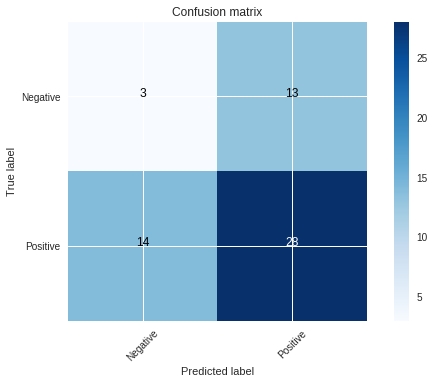

dummy classifier : f1 macro = 42.83%, f1 micro = 53.45%


In [12]:
print_clf_stats('dummy', DummyClassifier())

#### KNN classifier

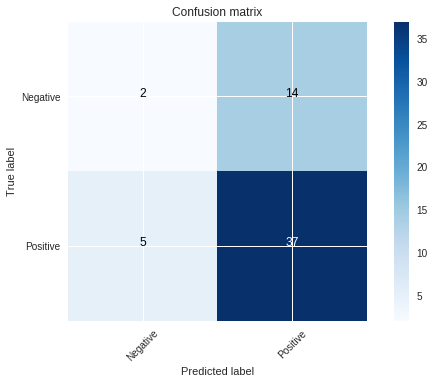

knn classifier : f1 macro = 48.48%, f1 micro = 67.24%


In [13]:
print_clf_stats('knn', KNeighborsClassifier())

#### Bar plot

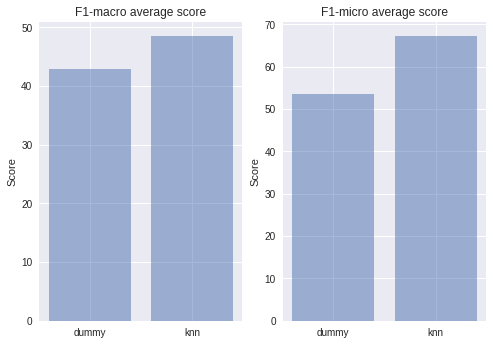

In [14]:
y_pos = np.arange(len(clfs))

for i,sc in enumerate(metrics):

  plt.subplot(1,2,1+i)
  y_s = [before[sc][x] for x in clfs]
  plt.bar(y_pos, y_s, align='center', alpha=0.5)
  plt.xticks(y_pos, clfs)
  plt.ylabel('Score')
  plt.title('F1-{} average score'.format(sc))

plt.show()

#### Σχολιασμός

Παρατηρούμε ότι ο dummy classifier λόγω του μη ισορροπημένου dataset κάνει σχετικά καλές προβλέψεις και για τις 2 μετρικές που χρησιμοποιούμε. Ο kNN έχει καλύτερο recall και precision.
Το micro average και στις 2 περιπτώσεις είναι υψηλότερο από το macro. Αυτή η διαφορά οφείλεται στο μη ισορρπομένο dataset, αφού το macro average δίνει το ίδιο βάρος στην πρόβλεψη για κάθε κλάση. Γενικά παρατηρούμε πως ο kNN δεν έχει πολύ καλή επίδοση σε αυτό το dataset.

## Βελτιστοποίηση ταξινομητών

Το dataset μας δεν έχει ούτε απουσιάζουσες τιμές ούτε κατηγορικές μεταβλητές άρα σε ότι αφορά την επεξεργασία πρέπει μόνο να επιλέξουμε και να εξάγουμε κατάλληλα χαρακτηριστικά. Συγκεκριμένα θα χρησιμοποιήσουμε έναν MinMaxScaler, έναν Variance Threshold, Random Overasampling λόγω του μη ισορροπημένου dataset και μετά PCA για την μείωση της διάστασης μιας και έχουμε 62 χαρακτηριστικά. Ο Random Oversampler θα επηρεάσει μόνο το train set.

Variance Threshold:

In [15]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold()
train_reduced = vt.fit_transform(X_train)
np.all(vt.get_support())

True

Παρατηρούμε πως όλες οι μεταβλητές έχουν θετική διασπορά άρα θα εφαρμόσουμε πρώτα έναν MinMaxScaler ώστε μετά να δοκιμάσουμε κάποιον VarianceThreshold transformer με θετικό κατώφλι.

Variance from 0.00699 to 0.08758


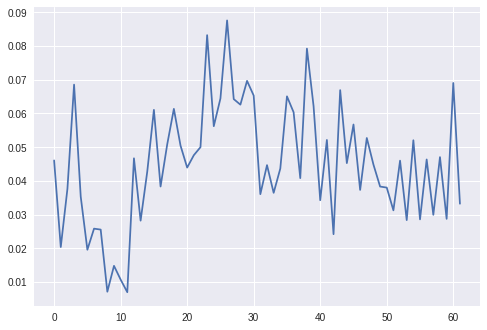

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
scaled_var = X_train_scaled.var(axis=0)
print('Variance from {:.5f} to {:.5f}'.format(scaled_var.min()
                                             , scaled_var.max()))
plt.plot(scaled_var)
plt.show()

Από το παραπάνω γράφημα πράγματι φαίνεται πως μερικά χαρακτηριστικά έχουν αρκετά μικρή διασπορά σε σχέση με την μέγιστη και αφού έχουμε πολλά χαρακτηριστικά καταλήγουμε πως θα προσθέσουμε τον Variance Threshold (μαζί με τον MixMaxScaler φυσικά) στο pipeline μας.
Μία υπερπαράμετρος που πρέπει να προσδιορίσουμε είναι το κατώφλι για τον Variance Threshold transformer.


Σε ότι αφορά το PCA μοναδική υπερπαράμετρος είναι ο αριθμός των συνιστωσών.

In [0]:
from sklearn.decomposition import PCA

Αρχικά θα υλοποιήσουμε το pipeline με τους transformers και τους classifiers.

In [0]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Pipeline(BaseEstimator, ClassifierMixin): 
    """Our pipeline implementation"""
    
    def __init__(self, clfs):
        
        self.clfs = clfs
        
    def fit(self, X, y):
        
        for clf in self.clfs[:-1]:
            if 'fit_transform' in dir(clf):
                X = clf.fit_transform(X)
            else: # RandomOverSampler
                X, y = clf.fit_sample(X, y)             
                
        self.clfs[-1].fit(X, y)
        
        return self
            
    def predict(self, X):
        for trans in self.clfs[:-1]:
            if 'transform' in dir(trans): 
                X = trans.transform(X)
            #else:  if ROS do nothing
        return self.clfs[-1].predict(X)
    
    def score(self, X, y):
        return(np.average(self.predict(X) == y))
        

Ελέγχουμε ότι όντως λειτουτγεί το pipeline μας:

In [0]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
Pipeline([MinMaxScaler(), VarianceThreshold(), RandomOverSampler(), 
          PCA(), KNeighborsClassifier()]).fit(X_train, y_train).score(X_test, y_test)

0.6896551724137931

Τώρα μένει να υλοποιήσουμε το grid search.
Θα δοκιμάσουμε 4 μοντέλα : 
- MinMaxScaler -> Variance Threshold -> RandomOverSampler -> PCA -> kNN
- MinMaxScaler -> Variance Threshold -> PCA -> kNN
- StandardScaler -> RandomOverSampler -> PCA -> kNN
- StandardScaler -> PCA -> kNN

Η υπερπαράμετρος του variance threshold θα μπορεί να πάρει και αρκετά μικρή τιμή που ισοδυναμεί με το να μην συμπεριλαμβάνεται ο transformer στο pipeline αφού δεν θα αλλάζει τίποτα.
Προφανώς για τον dummy classifier δεν έχουν κάποιο hyperparameter tuning να κάνουμε αφού μόνο ο ROS θα μπορούσε να αλλάξει κάτι στο αποτέλεσμα του.

Επίσης σημειώνουμε πως το να συμπεριλάβουμε τον ROS στο pipeline οδηγεί στο να κάνουμε ίσως πιο πολλές σωστές προβλέψεις για την κλάση με τα λιγότερα δείγματα, αυξάνοντας έτσι το f1_macro score που δίνει το ίδιο βάρος στις δύο κλάσεις. Είναι πιθανό έτσι να έχουμε μικρότερο f1_micro score, για αυτό περιλαμβάνουμε και μοντέλα που δεν έχουν τον ROS.

In [0]:
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')
import itertools
afters = [{} for _ in range(4)]
time_pred = {x : {} for x in metrics}
time_fit = {x : {} for x in metrics}
import pprint

In [23]:
vars_ = np.linspace(0.005, 0.020, 7)
comps = list(range(1,20,1))
neibs = list(range(3,31,2))
grid = list(itertools.product(*[vars_, comps, neibs]))
i = 0

scores = [
                [cross_val_score(Pipeline([
                    MinMaxScaler(), VarianceThreshold(threshold=t), RandomOverSampler(), PCA(n_components=n),
                    KNeighborsClassifier(n_neighbors=k)]),
                X_train, y_train, cv=10, scoring='f1_'+scoring).mean()
                for t,n,k in  grid
               ] for scoring in metrics]

print("Architecture {} : MinMax -> VT -> ROS -> PCA -> kNN".format(i+1))
print("Parameters : V_threshold, PCA_components, kNN_neibs")

for j, x in enumerate(metrics):
  afters[i][x] = grid[np.argmax(scores[j])], 100*np.max(scores[j])
  print("Best {} params:  -> {:.4f}, {}, {}, score = {:.2f}%".
      format(x, *afters[i][x][0], afters[i][x][1]))


Architecture 1 : MinMax -> VT -> ROS -> PCA -> kNN
Parameters : V_threshold, PCA_components, kNN_neibs
Best macro params:  -> 0.0100, 10, 19, score = 67.06%
Best micro params:  -> 0.0125, 16, 27, score = 78.22%


In [24]:
vars_ = np.linspace(0.005, 0.020, 7)
comps = list(range(1,20,1))
neibs = list(range(3,31,2))
grid = list(itertools.product(*[vars_, comps, neibs]))
i = 1

scores = [
          [cross_val_score(Pipeline([
              MinMaxScaler(), VarianceThreshold(threshold=t), PCA(n_components=n),
              KNeighborsClassifier(n_neighbors=k)]),
          X_train, y_train, cv=10, scoring='f1_'+scoring).mean()
          for t,n,k in  grid
         ] for scoring in metrics]

print("Architecture {} : MinMax -> VT -> PCA -> kNN".format(i+1))
print("Parameters : V_threshold, PCA_components, kNN_neibs")

for j, x in enumerate(metrics):
  afters[i][x] = grid[np.argmax(scores[j])], 100*np.max(scores[j])
  print("Best {} params:  -> {:.4f}, {}, {}, score = {:.2f}%".
      format(x, *afters[i][x][0], afters[i][x][1]))

Architecture 2 : MinMax -> VT -> PCA -> kNN
Parameters : V_threshold, PCA_components, kNN_neibs
Best macro params:  -> 0.0050, 6, 7, score = 64.05%
Best micro params:  -> 0.0050, 17, 7, score = 80.31%


In [25]:
comps = list(range(1,20,1))
neibs = list(range(3,31,2))
grid = list(itertools.product(*[ comps, neibs]))
i = 2

scores = [
          [cross_val_score(Pipeline([
              StandardScaler(), RandomOverSampler(), PCA(n_components=n),
              KNeighborsClassifier(n_neighbors=k)]),
          X_train, y_train, cv=10, scoring='f1_'+scoring).mean()
          for n,k in  grid
         ] for scoring in metrics]

print("Architecture {} : StdScaler -> ROS -> PCA -> kNN".format(i+1))
print("Parameters : PCA_components, kNN_neibs")

for j, x in enumerate(metrics):
  afters[i][x] = grid[np.argmax(scores[j])], 100*np.max(scores[j])
  print("Best {} params:  -> {}, {}, score = {:.2f}%".
      format(x, *afters[i][x][0], afters[i][x][1]))

Architecture 3 : StdScaler -> ROS -> PCA -> kNN
Parameters : PCA_components, kNN_neibs
Best macro params:  -> 7, 23, score = 67.65%
Best micro params:  -> 9, 29, score = 78.04%


In [26]:
comps = list(range(1,20,1))
neibs = list(range(3,31,2))
grid = list(itertools.product(*[ comps, neibs]))
i = 3

scores = [
          [cross_val_score(Pipeline([
              StandardScaler(), PCA(n_components=n),
              KNeighborsClassifier(n_neighbors=k)]),
          X_train, y_train, cv=10, scoring='f1_'+scoring).mean()
          for n,k in  grid
         ] for scoring in metrics]

print("Architecture {} : StdScaler -> PCA -> kNN".format(i+1))
print("Parameters : PCA_components, kNN_neibs")

for j, x in enumerate(metrics):
  afters[i][x] = grid[np.argmax(scores[j])], 100*np.max(scores[j])
  print("Best {} params:  -> {}, {}, score = {:.2f}%".
      format(x, *afters[i][x][0], afters[i][x][1]))

Architecture 4 : StdScaler -> PCA -> kNN
Parameters : PCA_components, kNN_neibs
Best macro params:  -> 15, 7, score = 64.05%
Best micro params:  -> 5, 13, score = 80.72%


In [27]:
for y in metrics:
  best = np.argmax([afters[x][y][1] for x in range(4)])
  print("Με βάση το f1_{} score, καλύτερη αρχιτεκτονική είναι η {} με παραμέτρους:".format(y,best+1))
  after[y] = afters[best][y]
  pprint.pprint(after[y][0])

Με βάση το f1_macro score, καλύτερη αρχιτεκτονική είναι η 3 με παραμέτρους:
(7, 23)
Με βάση το f1_micro score, καλύτερη αρχιτεκτονική είναι η 4 με παραμέτρους:
(5, 13)


#### Παρακάτω παραθέτουμε Confusion Matrix για τα δύο μοντέλα που προέκυψαν για τον kNN:

Confusion Matrix (Best f1_macro model):


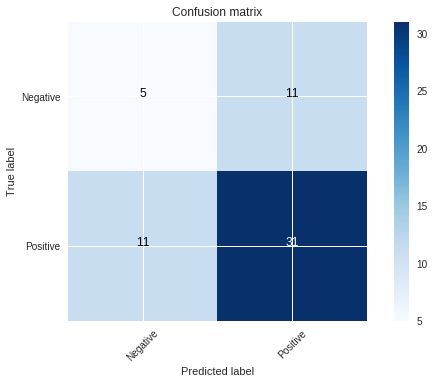

f1_macro score on test set: 52.53

Confusion Matrix (Best f1_micro model):


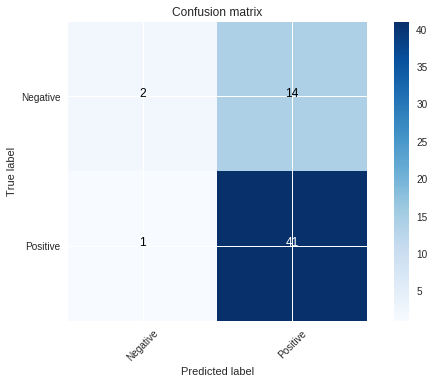

f1_micro score on test set: 74.14



In [43]:
for x in metrics:
  if x == 'macro':
    pipe = Pipeline([StandardScaler(), RandomOverSampler(), PCA(n_components=7), KNeighborsClassifier(n_neighbors=23)])
  else:
    pipe = Pipeline([StandardScaler(), PCA(n_components=5), KNeighborsClassifier(n_neighbors=13)])
  
  start_time = time.time()
  pipe.fit(X_train, y_train)
  time_fit[x]['knn'] = time.time() - start_time
  
  start_time = time.time()
  y_pred = pipe.predict(X_test)
  time_pred[x]['knn'] = time.time() - start_time
  
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix (Best f1_{} model):".format(x)) 
  plot_confusion_matrix(cm, ['Negative', 'Positive'])
  
  test_score = 100*f1_score(y_test, y_pred, average=x)
  print("f1_{} score on test set: {:.2f}\n".format(x, test_score))
  
  after[x]= after[x][0], test_score

Παρατηρούμε πως το μοντέλο που επιλέξαμε βάσει του macro score έχει περισσότερα True Negatives από το άλλο μοντέλο. Έχει όμως μικρότερο recall score λόγω αυτού. Σε γενικές γραμμές δηλαδή βλέπουμε πως το μοντέλο μας αδυνατεί να ξεχωρίσει τα negatives, και προβλέπει λίγες φορές αυτή την κλάση.

#### Χρόνοι εκτέλεσης για τον kNN

In [44]:
print('Time elapsed')
for x in metrics:
  print('Fit, {} : {:.5f}s'.format(x, time_fit[x]['knn']))
  print('Predict, {} : {:.5f}s'.format(x, time_pred[x]['knn']))

Time elapsed
Fit, macro : 0.02223s
Predict, macro : 0.00202s
Fit, micro : 0.00596s
Predict, micro : 0.00131s


Όπως περιμέναμε ο χρόνος εκπαίδευσης είναι μεγαλύτερος από τον χρόνο πρόβλεψης κατά 1-2 τάξεις μεγέθους. Οι μεγαλύτεροι χρόνοι στο μοντέλο που επιλέχτηκε βάσει του f1_macro score είναι μεγαλύτεροι λόγω του oversampler που προσθέτει παραπάνω δείγματα.

#### Bar Plot σύγκρισης

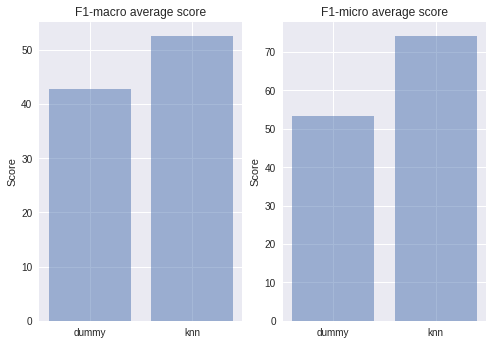

In [45]:
y_pos = np.arange(len(clfs))
for i,x in enumerate(metrics):
  plt.subplot(1,2,1+i)
  plt.bar(y_pos, [before[x]['dummy'], after[x][1]], align='center', alpha=0.5)
  plt.xticks(y_pos, clfs)
  plt.ylabel('Score')
  plt.title('F1-{} average score'.format(x))
  
plt.show()

Παρατηρούμε πως η επίδοση του kNN είναι καλύτερη από την τετριμμένη, όχι όμως σε αρκετά ικανοποιητικό επίπεδο.

#### Μεταβολή επίδοσης

In [46]:
print("kNN test score difference after tuning (%)")
for x in metrics:
  print("{} score : {:.2f}%".format(x, after[x][1]-before[x]['knn']))

kNN test score difference after tuning (%)
macro score : 4.05%
micro score : 6.90%


Παρατηρούμε πως υπάρχει μία βελτίωση μετά το hyperparameter tuning. Παρ' όλα αυτά στη διαδικασία έχουμε μεγάλη τυχαιότητα λόγω του ROS και έτσι σε επόμενη εκτέλεση βγήκε χειρότερο αποτέλεσμα. Ίσως το μοντέλο μας απλά κάνει overfit και προβλέπει κυρίως Positive κλάση. Ο kNN δεν φαίνεται να είναι σωστή επιλογή για αυτό το dataset.